https://cloud.tencent.com/developer/article/1893201

In [1]:
# 设置cell宽度
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 警告
import warnings
warnings.filterwarnings('ignore')

# matplotlib
from tqdm import tqdm
from pprint import pprint
from matplotlib import pylab
from seaborn import set_style
set_style("whitegrid")
%matplotlib inline

# matplotlib 中文乱码、正负号乱码
from platform import system
os_name = system()
print(os_name)

from matplotlib import rcParams
rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
if os_name == r"Windows":
    rcParams["font.sans-serif"]=["SimHei"] #设置字体
elif os_name == r"Darwin":
    rcParams['font.family'] = 'PingFang HK'
else:
    pass


# 调整运行根目录
import os
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
#os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
print(os.getcwd()) 

# Dataframe显示格式
from pandas import set_option
set_option('display.max_info_rows',1000)
set_option('display.max_rows',1000)
set_option('display.max_columns',1000)
set_option('display.max_colwidth',1000)
set_option('display.float_format',lambda x : '%.4f' % x)

Windows
D:\github\xueqiu\Date20221228 绿巨柱分析


In [2]:
from pandas import read_csv, read_excel
from os import getcwd, sep, listdir
from matplotlib import pyplot
import re

from matplotlib import pyplot
from mpl_finance import candlestick_ohlc
from pandas import concat
from dateutil.parser import parse

warnings.filterwarnings('ignore')

C:\Software\miniconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [3]:
def get_weight_from_zz(index_symbol: str):
    """
    中证指数

    :param index_symbol:
    :return:
    """
    weight = getcwd() + sep + r"data" + sep + r"{}perf.xlsx".format(index_symbol)
    weight = read_excel(io=weight, dtype=str)
    weight.columns = [''.join(re.findall(re.compile(u'[\u4e00-\u9fa5]'), i)) for i in weight.columns]
    weight.loc[:, ["开盘", "最高", "最低", "收盘"]] = weight.loc[:, ["开盘", "最高", "最低", "收盘"]].astype(float)
    weight["成交量"] = (weight["成交量万手"].astype("float64") * 10000).astype("int64")
    weight = weight.sort_values("日期").reset_index(drop=True)
    return weight

def get_weight_from_gz(index_symbol: str):
    """
    国证指数

    :param index_symbol:
    :return:
    """
    weight = listdir(getcwd() + sep + r"data")
    weight = [i for i in weight if index_symbol in i and "_perf_" in i]
    weight = weight[0]
    weight = getcwd() + sep + r"data" + sep + weight
    weight = read_excel(io=weight, dtype=str)
    weight.columns = [''.join(re.findall(re.compile(u'[\u4e00-\u9fa5]'), i)) for i in weight.columns]
    weight.loc[:, ["开盘价", "最高价", "最低价", "收盘价"]] = weight.loc[:, ["开盘价", "最高价", "最低价", "收盘价"]].astype(float)
    weight["成交量"] = (weight["成交量万手"].astype("float64") * 10000).astype("int64")
    weight = weight.sort_values("日期").reset_index(drop=True)
    return weight

In [4]:
weight = dict()
weight["中证全指"] = get_weight_from_zz("000985")
weight["上证50"] = get_weight_from_zz("000016")
weight["沪深300"] = get_weight_from_zz("000300")
weight["中证500"] = get_weight_from_zz("000905")
weight["中证1000"] = get_weight_from_zz("000852")
weight["创业板指"] = get_weight_from_gz("399006")
weight["深证100"] = get_weight_from_gz("399330")
weight["国证1000"] = get_weight_from_gz("399311")
weight["国证2000"] = get_weight_from_gz("399303")

In [16]:
index_name = "中证1000"
start_date= "20181231"

data = weight[index_name].set_index("日期")
data.sort_index(inplace=True)
data["成交量MA"] = (data["成交量"].rolling(5).mean().shift(1) + data["成交量"].rolling(5).mean().shift(-5)) / 2
data["成交量占比MA"] = data["成交量"] / data["成交量MA"]
data = data.loc["20181231":]
data["阴线"] = data["收盘"] < data["开盘"]
data["山字"] = (data["成交量"] > data["成交量"].shift(1)) & (data["成交量"] > data["成交量"].shift(-1))
data.dropna(inplace=True)
data = data.loc[data["阴线"]]
data = data.loc[data["山字"]].sort_values("成交量占比MA",ascending=False)

<Figure size 1200x800 with 0 Axes>

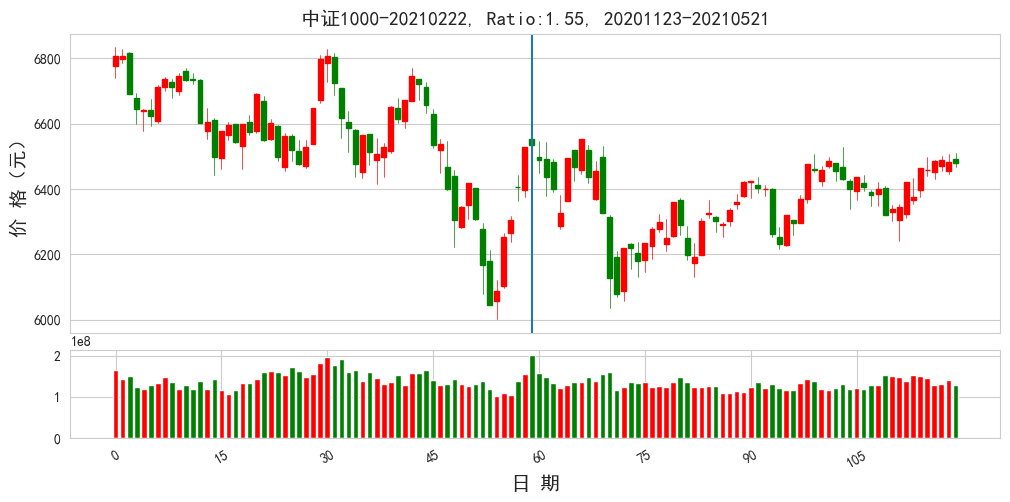

<Figure size 1200x800 with 0 Axes>

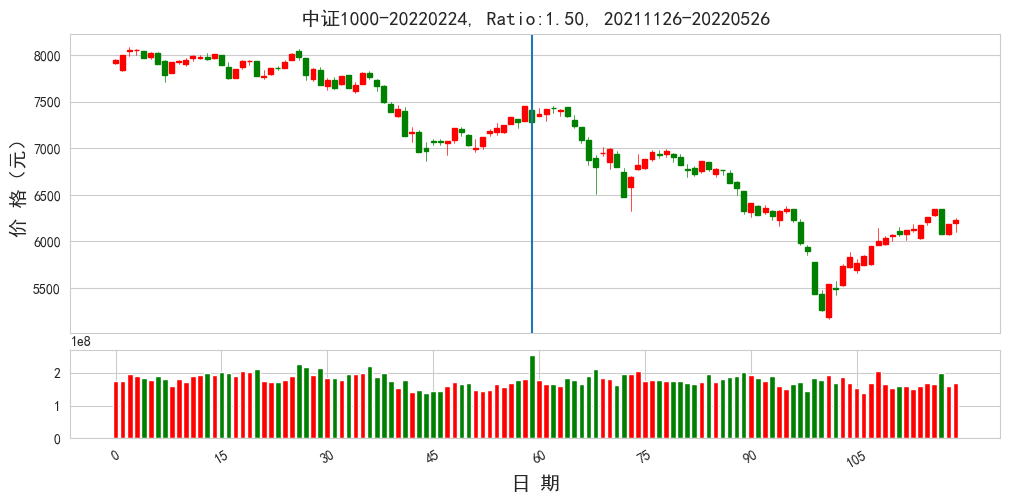

<Figure size 1200x800 with 0 Axes>

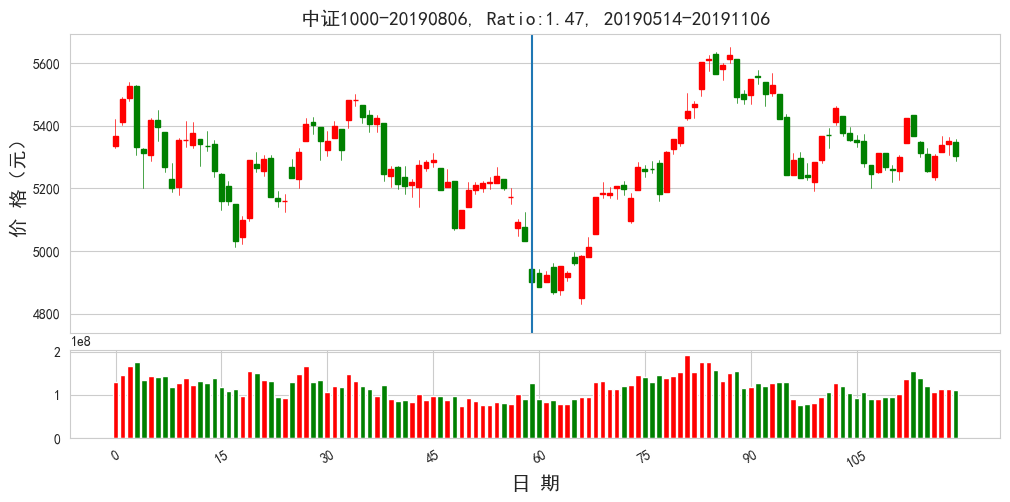

<Figure size 1200x800 with 0 Axes>

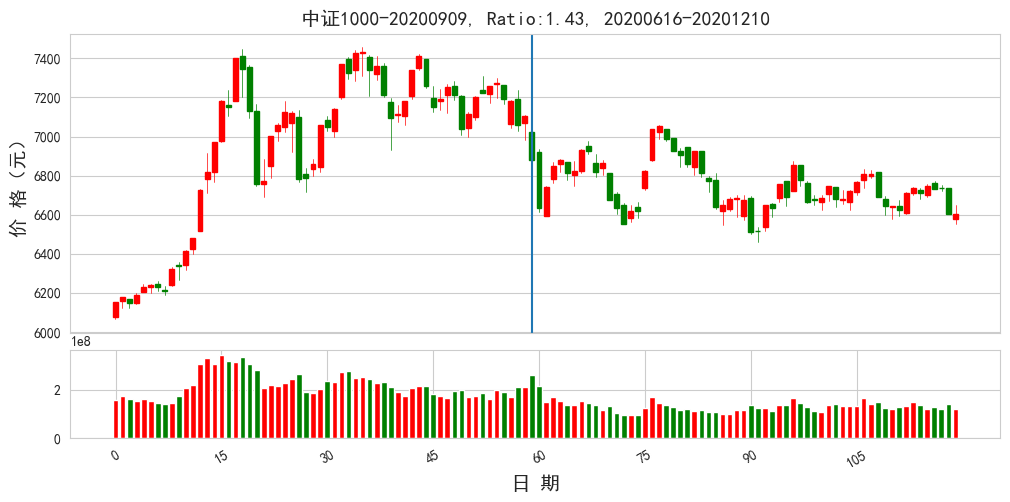

<Figure size 1200x800 with 0 Axes>

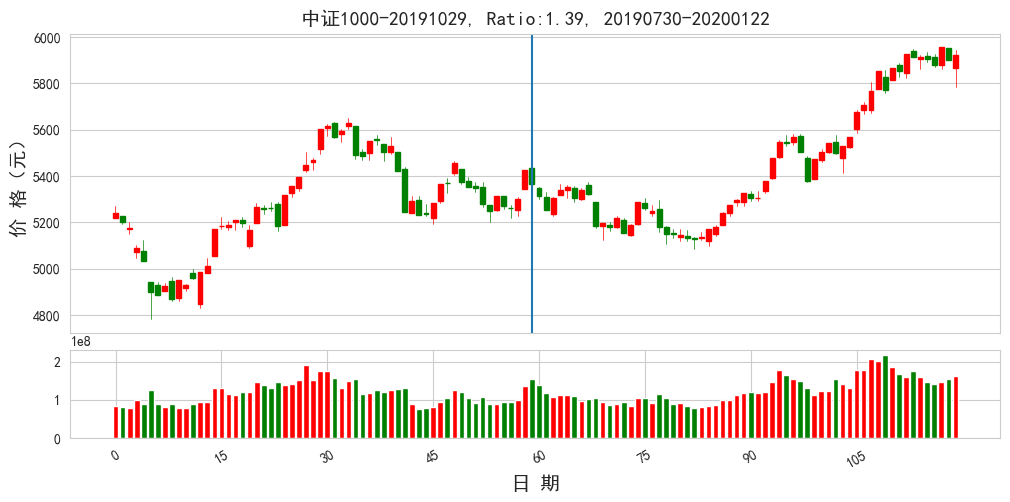

<Figure size 1200x800 with 0 Axes>

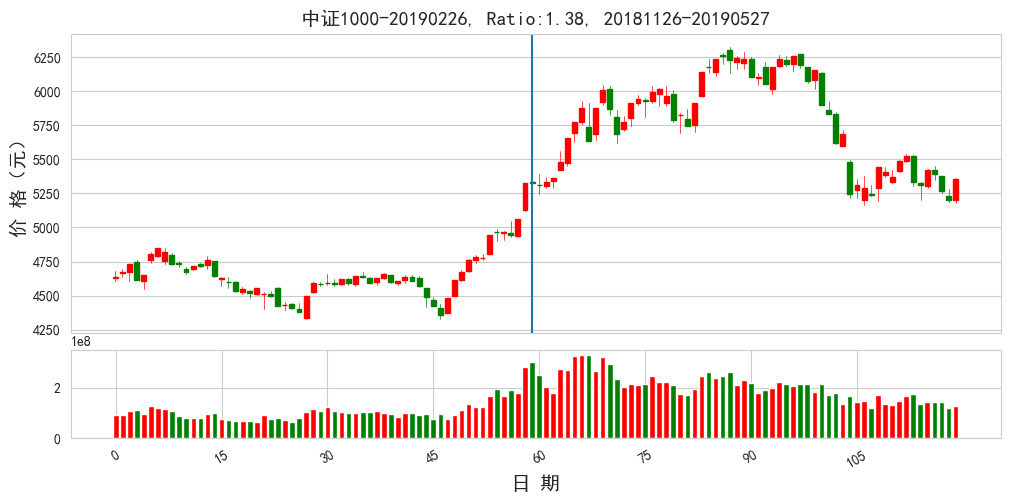

<Figure size 1200x800 with 0 Axes>

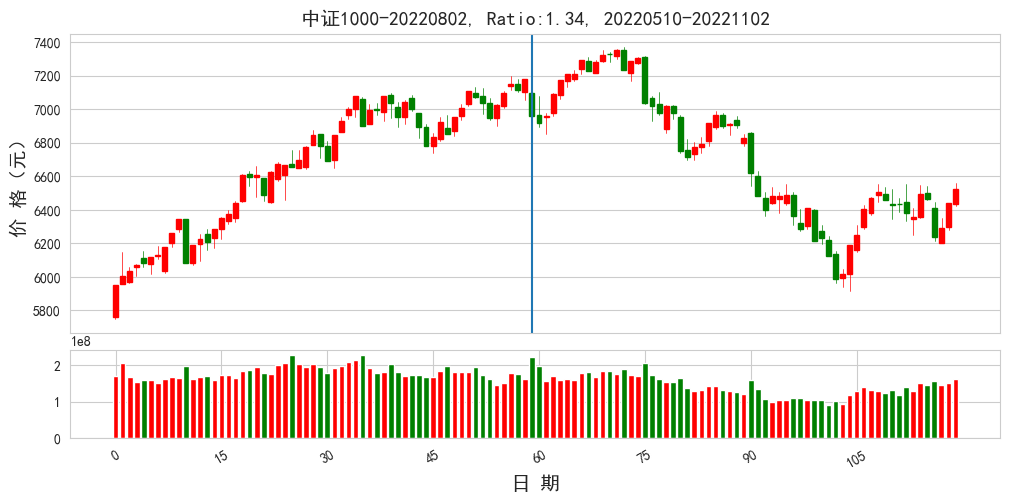

<Figure size 1200x800 with 0 Axes>

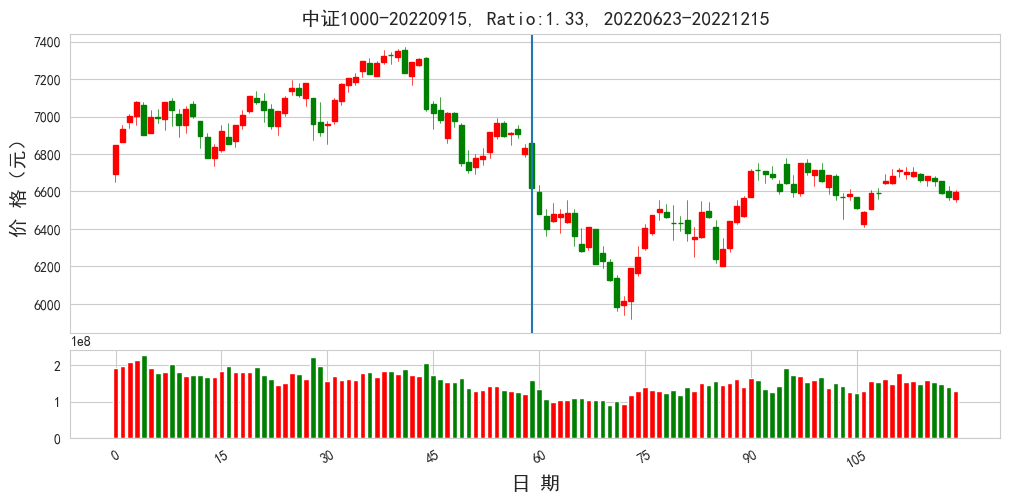

<Figure size 1200x800 with 0 Axes>

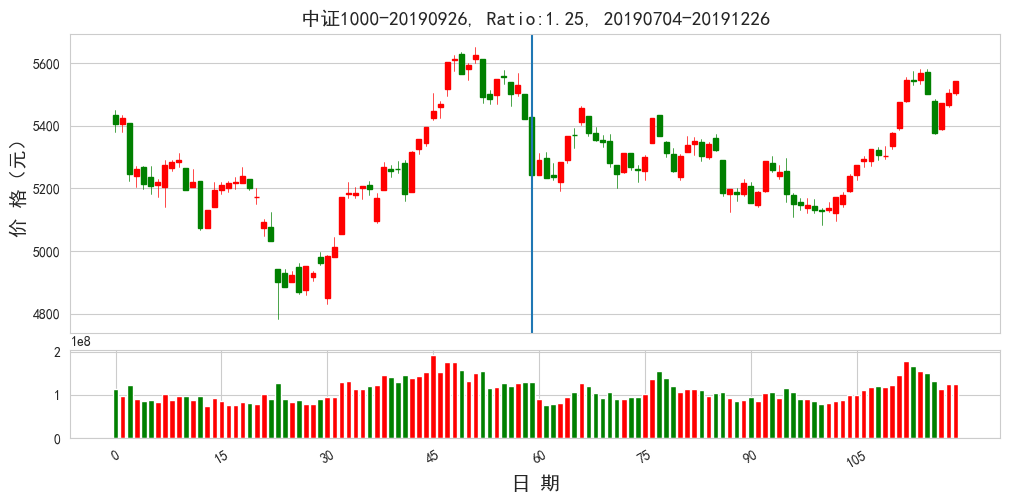

<Figure size 1200x800 with 0 Axes>

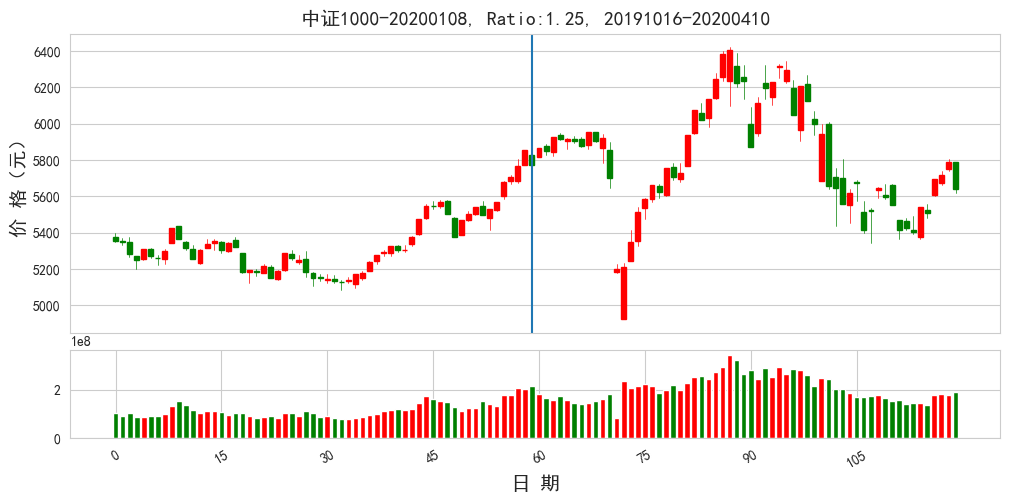

<Figure size 1200x800 with 0 Axes>

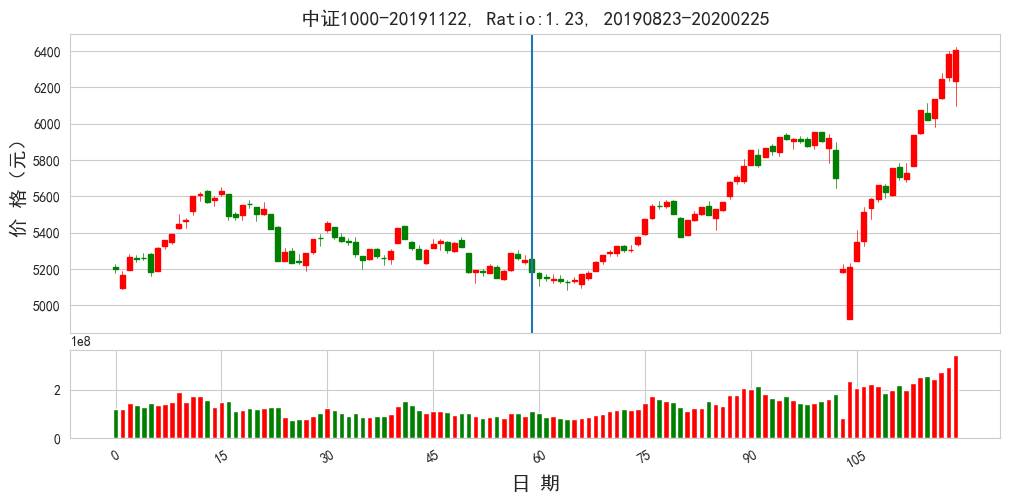

<Figure size 1200x800 with 0 Axes>

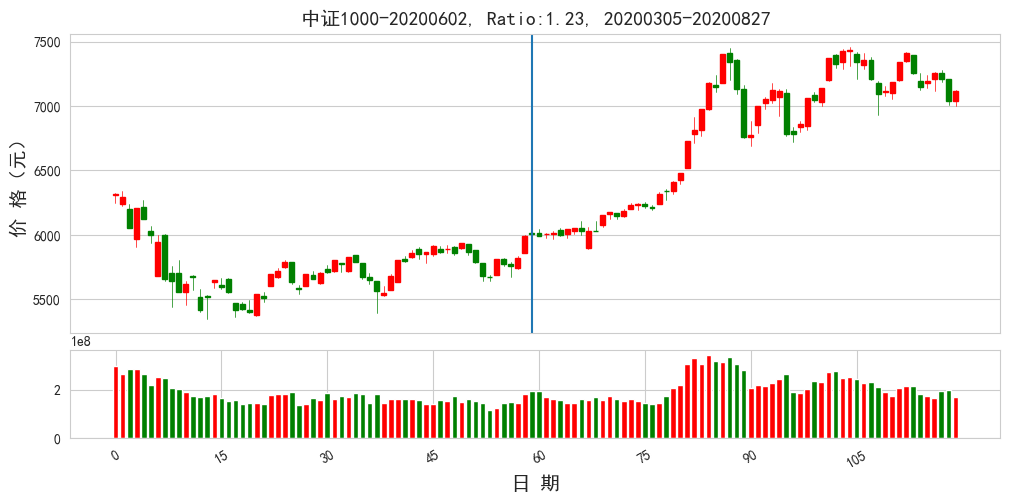

<Figure size 1200x800 with 0 Axes>

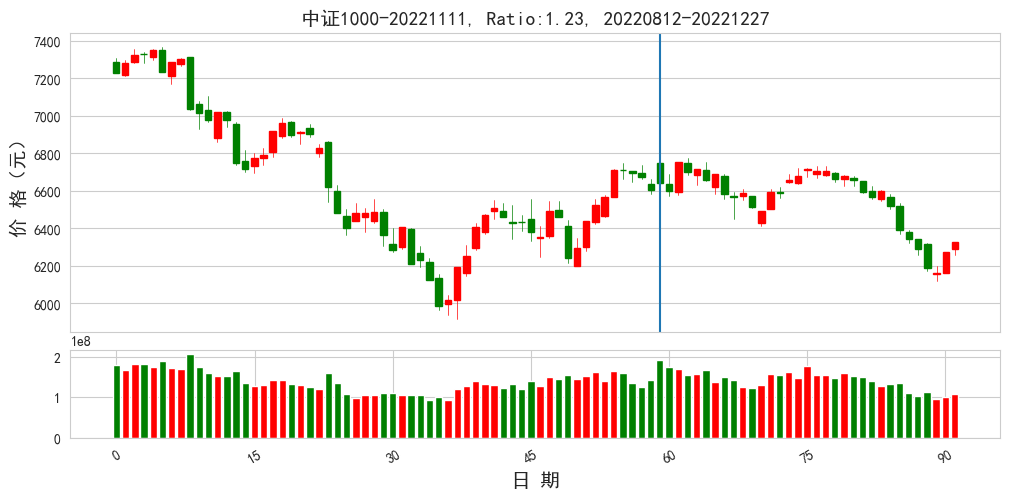

<Figure size 1200x800 with 0 Axes>

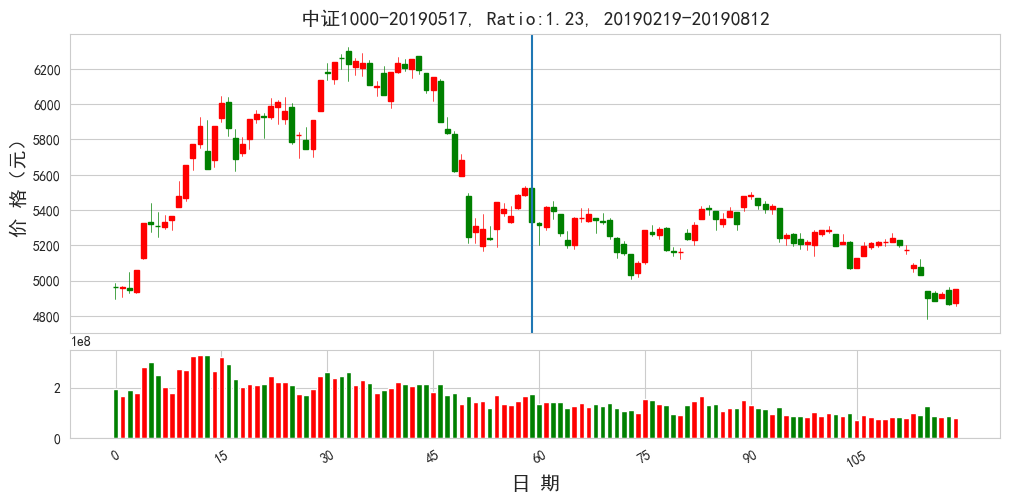

<Figure size 1200x800 with 0 Axes>

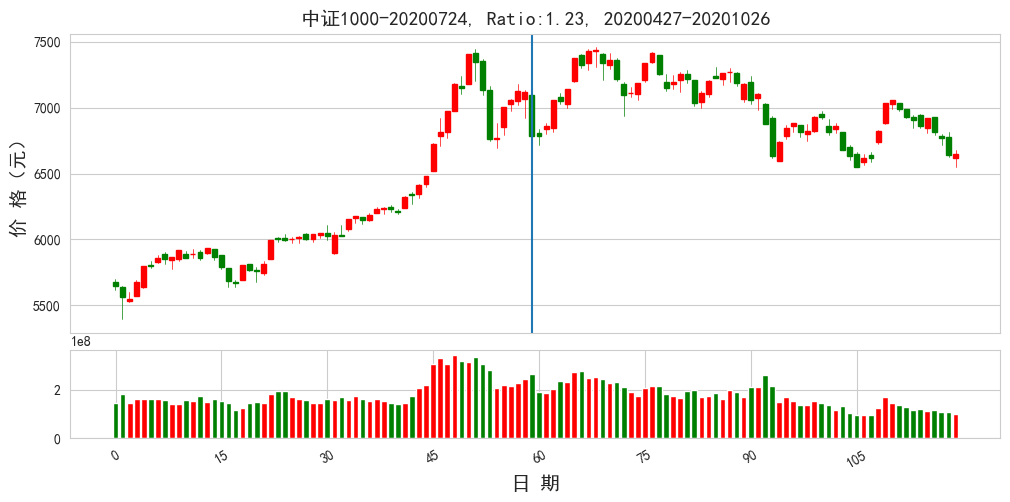

<Figure size 1200x800 with 0 Axes>

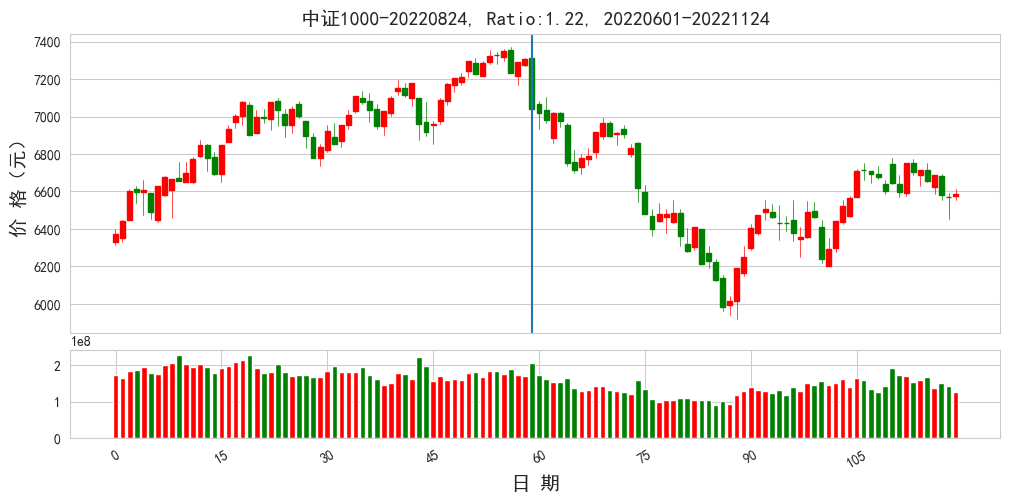

<Figure size 1200x800 with 0 Axes>

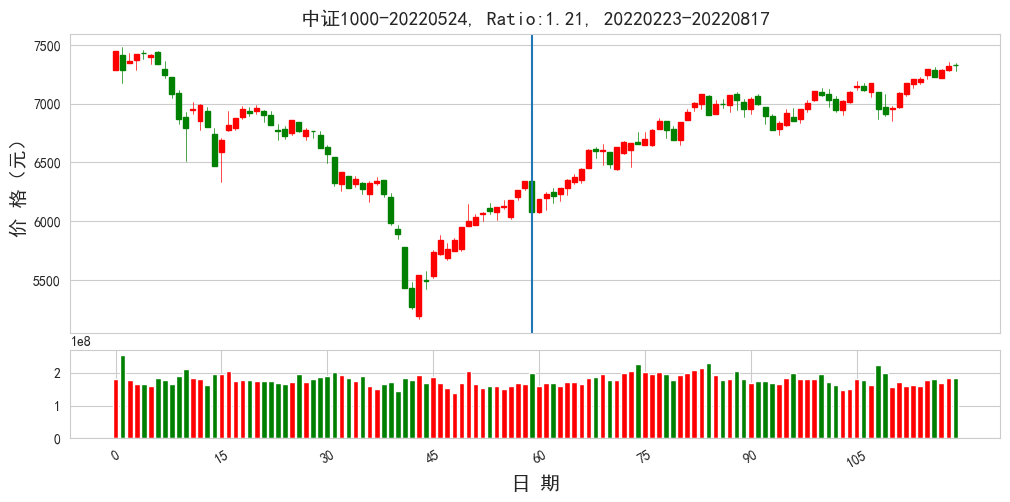

<Figure size 1200x800 with 0 Axes>

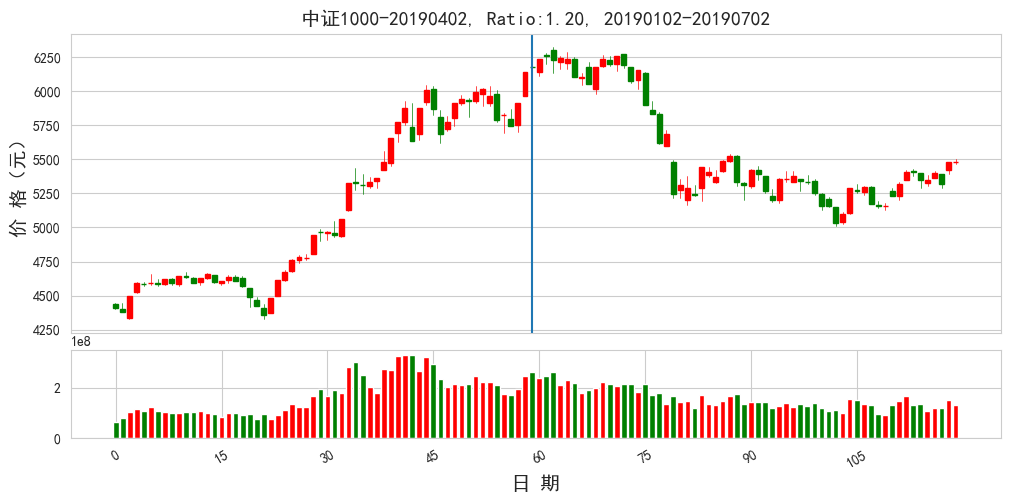

<Figure size 1200x800 with 0 Axes>

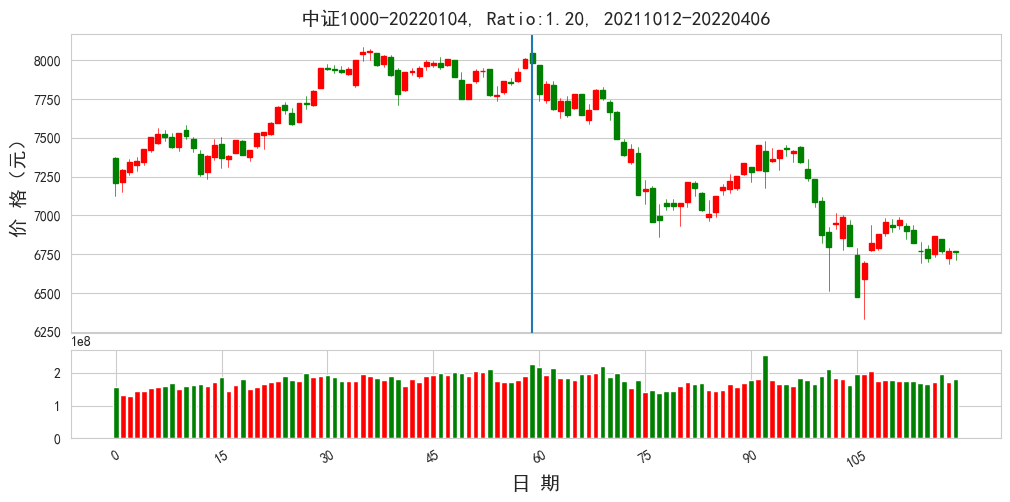

<Figure size 1200x800 with 0 Axes>

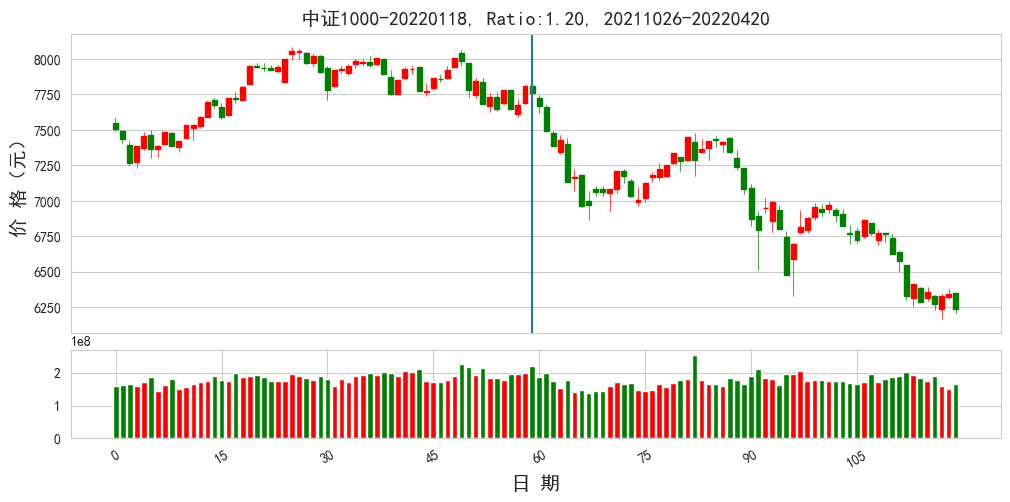

<Figure size 1200x800 with 0 Axes>

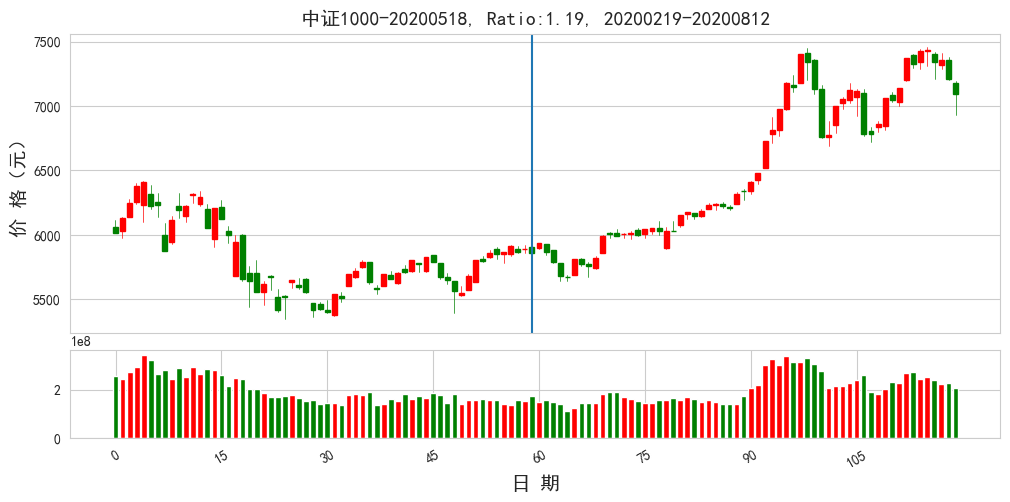

<Figure size 1200x800 with 0 Axes>

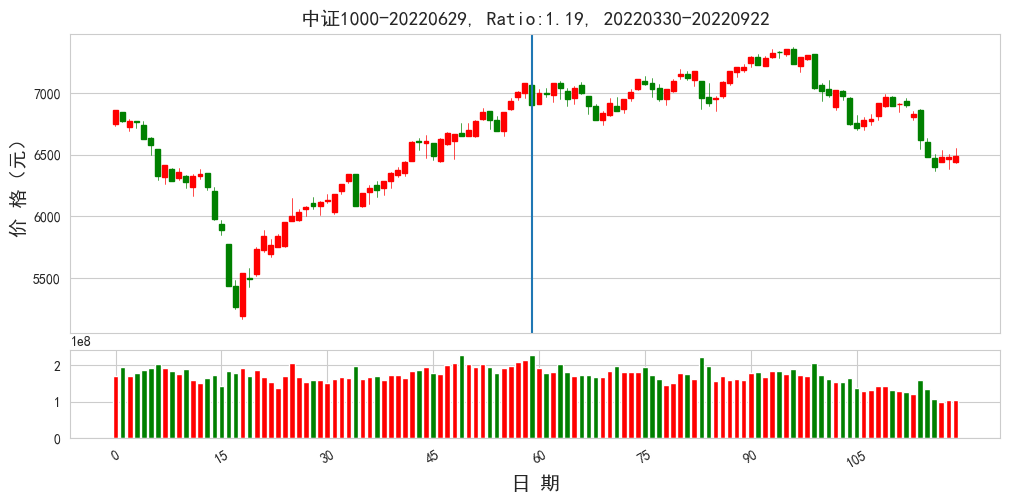

<Figure size 1200x800 with 0 Axes>

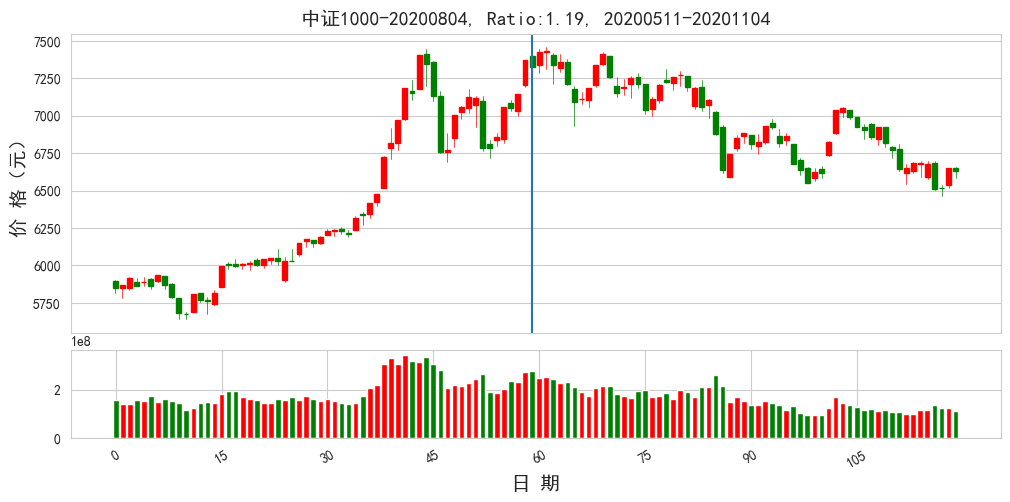

<Figure size 1200x800 with 0 Axes>

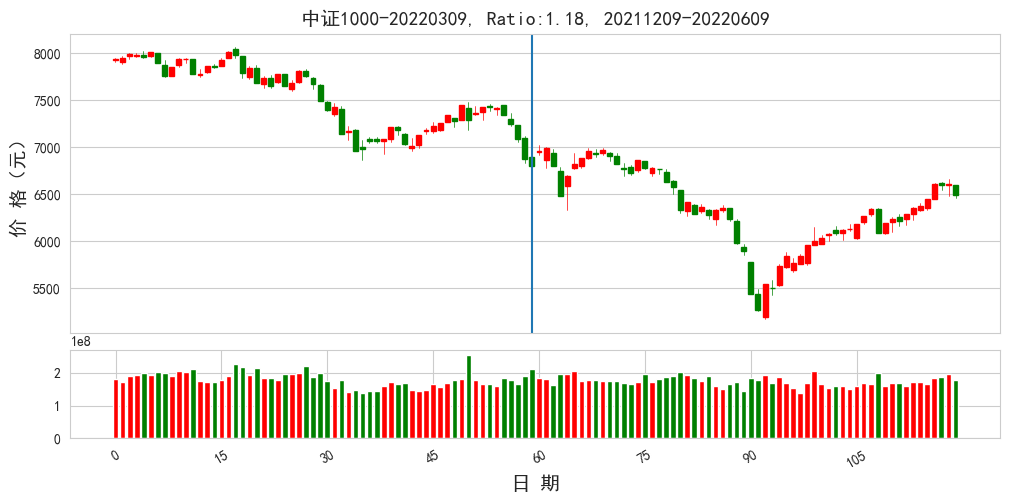

<Figure size 1200x800 with 0 Axes>

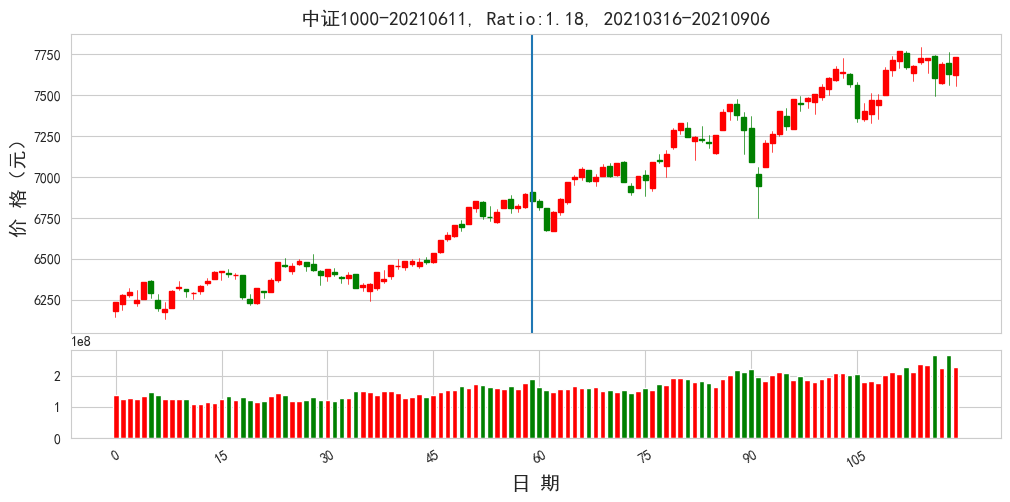

<Figure size 1200x800 with 0 Axes>

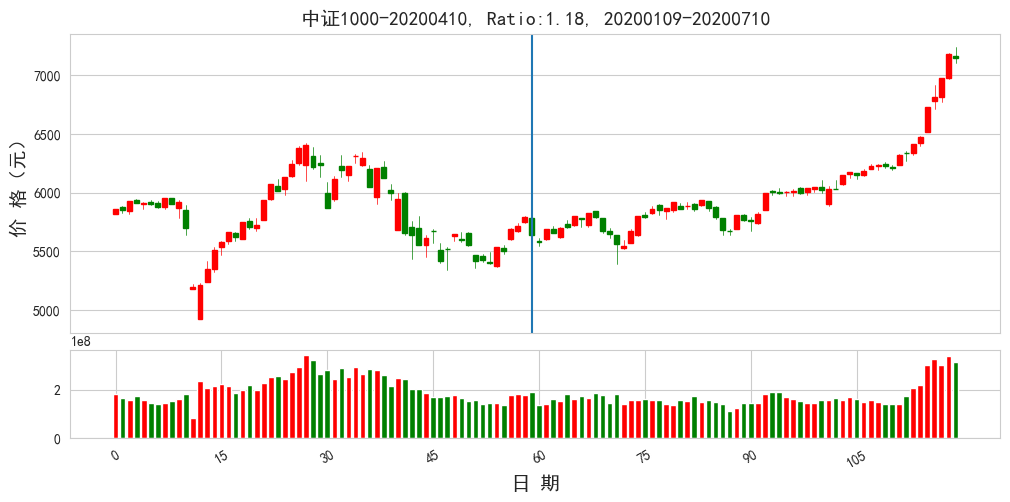

<Figure size 1200x800 with 0 Axes>

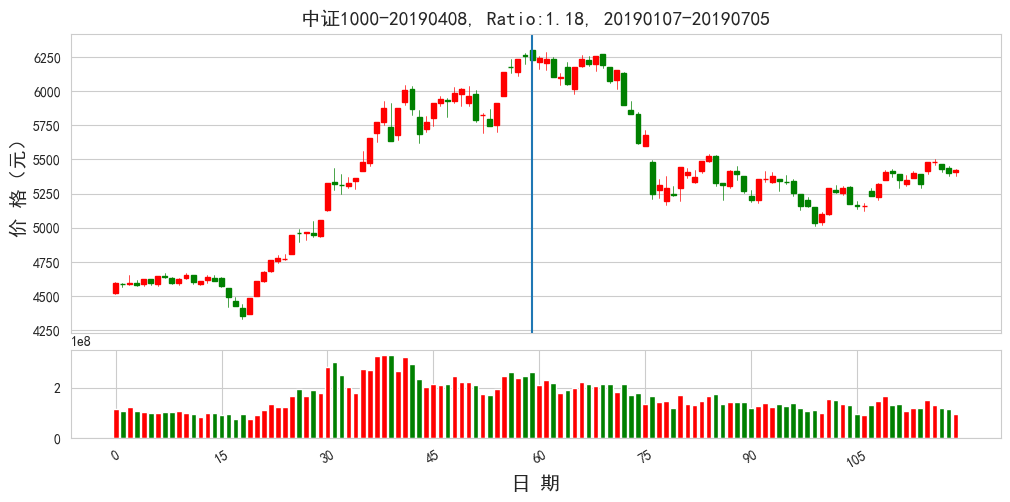

<Figure size 1200x800 with 0 Axes>

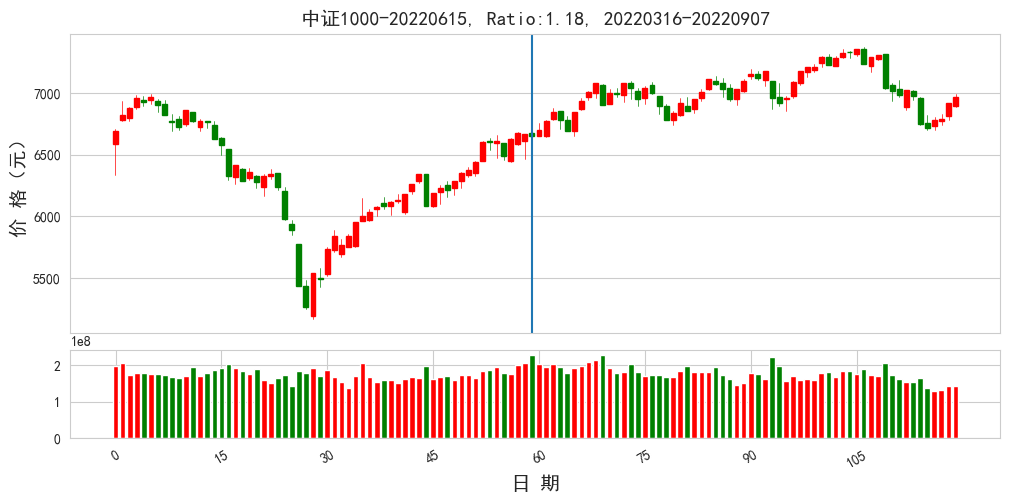

<Figure size 1200x800 with 0 Axes>

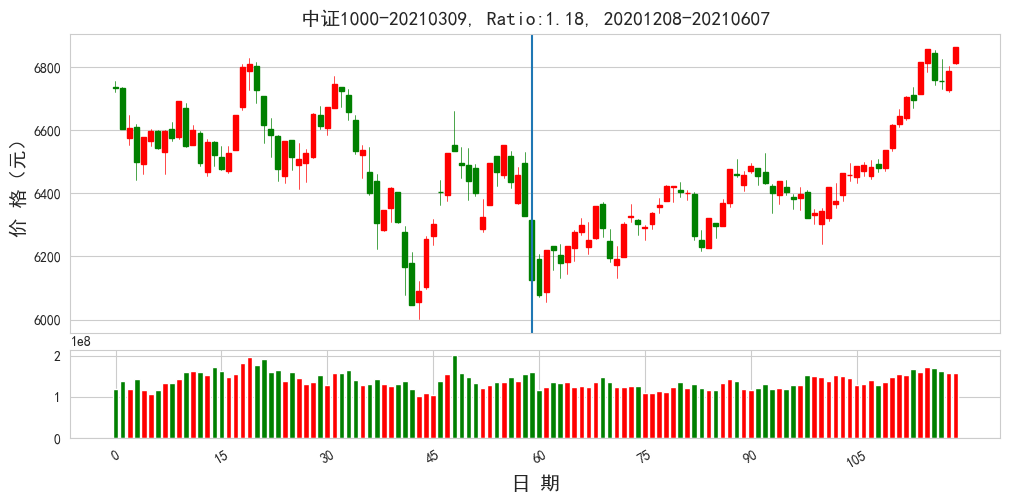

<Figure size 1200x800 with 0 Axes>

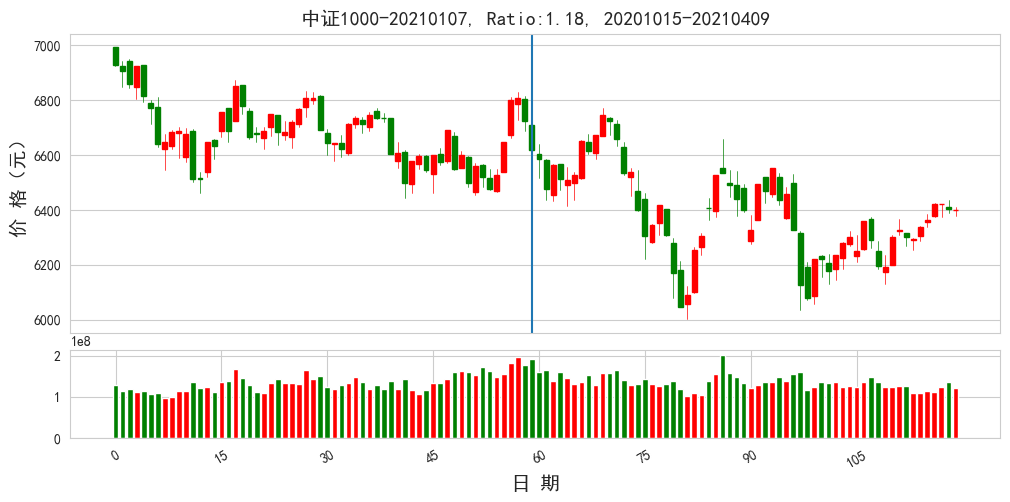

In [21]:
for label_date in data.index[:30]:
    plot_data = weight[index_name].set_index("日期")
    plot_data = concat([plot_data.loc[:label_date].iloc[-60:], plot_data.loc[label_date:].iloc[1:61]])
    plot_data.reset_index(drop=False, inplace=True)
    label_line_idx = plot_data.loc[plot_data["日期"] == label_date].index[0]

    # 图
    fig = pyplot.figure(figsize=(12, 8))
    grid = pyplot.GridSpec(12, 8, wspace=0.5, hspace=0.5)

    # （1）绘制K线图
    # K线数据
    ohlc = plot_data[['日期', '开盘', '最高', '最低', '收盘']]
    ohlc.loc[:, '日期'] = range(len(ohlc))  # 重新赋值横轴数据，绘制K线图无间隔

    # 5、绘制成交量
    fig = pyplot.figure(figsize=(12, 8))
    grid = pyplot.GridSpec(12, 8, wspace=0.5, hspace=0.5)

    # 绘制K线
    ax1 = fig.add_subplot(grid[0:6, 0:12])  # 设置K线图的尺寸
    candlestick_ohlc(ax1, ohlc.values.tolist(), width=.7, colorup='red', colordown='green')
    pyplot.title("{0}-{1}, Ratio:{2:.2f}, {3}-{4}".format(index_name, label_date, data.loc[label_date, "成交量占比MA"], plot_data["日期"][0], plot_data["日期"].iloc[-1]), fontsize=14)  # 设置图片标题
    pyplot.ylabel('价 格（元）', fontsize=14)  # 设置纵轴标题
    ax1.set_xticks([])  # 日期标注在成交量中，故清空此处x轴刻度
    ax1.set_xticklabels([])  # 日期标注在成交量中，故清空此处x轴 
    pyplot.axvline(label_line_idx)

    # （2）绘制成交量
    # 成交量数据
    data_volume = plot_data[['日期', '收盘', '开盘', '成交量']]
    data_volume['color'] = data_volume.apply(lambda row: 1 if row['收盘'] >= row['开盘'] else 0,
                                             axis=1)  # 计算成交量柱状图对应的颜色，使之与K线颜色一致
    data_volume["日期"] = ohlc["日期"]
    # 绘制成交量
    ax2 = fig.add_subplot(grid[6:8, 0:12])  # 设置成交量图形尺寸
    ax2.bar(data_volume.query('color==1')['日期'], data_volume.query('color==1')['成交量'], color='r')  # 绘制红色柱状图
    ax2.bar(data_volume.query('color==0')['日期'], data_volume.query('color==0')['成交量'], color='g')  # 绘制绿色柱状图
    pyplot.xticks(rotation=30)
    pyplot.xlabel('日 期', fontsize=14)  # 设置横轴标题
    # 修改横轴日期标注
    date_list = ohlc.index.tolist()  # 获取日期列表
    xticks_len = round(len(date_list) / (len(ax2.get_xticks()) - 1))  # 获取默认横轴标注的间隔
    xticks_num = range(0, len(date_list), xticks_len)  # 生成横轴标注位置列表
    xticks_str = list(map(lambda x: date_list[int(x)], xticks_num))  # 生成正在标注日期列表
    ax2.set_xticks(xticks_num)  # 设置横轴标注位置
    ax2.set_xticklabels(xticks_str)  # 设置横轴标注日期
    pyplot.show()